
# DATA UNDERSTANDING  
## Studi Kasus: Iris Flower Dataset

---

## 2.1 Pendahuluan

Dalam proses data mining, Data Understanding merupakan tahap yang sangat krusial karena menjadi fondasi sebelum dilakukan pembersihan data (Data Preparation) dan pemodelan (Modeling). 
Tahap ini bertujuan untuk memahami karakteristik data secara menyeluruh, baik dari sisi struktur, tipe data, kualitas data, maupun pola distribusinya.

Tanpa pemahaman data yang baik, model yang dibangun berisiko menghasilkan kesimpulan yang bias atau tidak valid.

## 2.2 Tujuan Data Understanding

Tujuan utama dari tahap ini adalah:

1. Memastikan dataset dapat dibaca dengan benar.
2. Memahami struktur dan tipe data.
3. Mengidentifikasi potensi masalah seperti missing value dan duplikasi.
4. Menganalisis distribusi dan pola awal melalui statistik deskriptif.
5. Melakukan visualisasi untuk memahami hubungan antar fitur.

Dataset yang digunakan adalah Iris Flower Dataset yang terdiri dari 150 observasi dan 5 atribut.



# Persiapan Lingkungan Analisis

## 2.3 Import Library

Sebelum melakukan analisis, diperlukan beberapa library Python untuk membantu proses manipulasi dan visualisasi data.

Library yang digunakan:

- pandas → untuk membaca dan mengelola dataset.
- matplotlib → untuk membuat visualisasi grafik dasar.
- seaborn → untuk visualisasi statistik yang lebih informatif.

Pastikan seluruh library telah terinstall sebelum menjalankan notebook ini.


In [1]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Membaca Dataset

## 2.4 Memuat Dataset

Dataset dibaca menggunakan fungsi `read_csv()` dari library pandas.
File IRIS.csv harus berada dalam folder yang sama dengan notebook ini.

Langkah ini penting untuk memastikan bahwa file dapat diakses tanpa error.


In [2]:

df = pd.read_csv("IRIS.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Dari lima baris pertama di atas dapat diamati bahwa:

- Dataset memiliki empat fitur numerik:
  - sepal_length
  - sepal_width
  - petal_length
  - petal_width
- Satu fitur kategorikal yaitu species.

Hal ini menunjukkan bahwa dataset sesuai dengan dokumentasi Iris standar.



# Eksplorasi Struktur Dataset

## 2.5 Dimensi Dataset

Fungsi `shape` digunakan untuk mengetahui jumlah baris dan kolom dalam dataset.


In [3]:
df.shape

(150, 5)


Hasil menunjukkan dataset terdiri dari 150 baris dan 5 kolom.
Jumlah ini sesuai dengan referensi dataset Iris yang umum digunakan dalam machine learning.



## 2.6 Informasi Dataset

Fungsi `info()` digunakan untuk melihat tipe data setiap kolom serta memastikan tidak ada nilai kosong tersembunyi.


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB



Dari hasil di atas dapat disimpulkan:

- Empat kolom bertipe float (numerik).
- Satu kolom bertipe object (kategori).
- Tidak terdapat nilai null pada seluruh kolom.

Hal ini menunjukkan struktur dataset sudah konsisten dan siap dianalisis lebih lanjut.



# Statistik Deskriptif

## 2.7 Ringkasan Statistik

Statistik deskriptif digunakan untuk memahami distribusi nilai numerik pada setiap fitur.
Informasi yang diperoleh meliputi:

- Nilai minimum dan maksimum
- Mean (rata-rata)
- Standar deviasi
- Kuartil (Q1, median, Q3)

Langkah ini membantu mendeteksi anomali atau nilai ekstrem.


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Berdasarkan hasil statistik:

- Tidak terdapat nilai negatif.
- Rentang nilai masih dalam batas biologis yang wajar.
- Penyebaran data relatif stabil.

Hal ini menunjukkan dataset dalam kondisi baik dan tidak terdapat anomali signifikan.



# Pemeriksaan Kualitas Data

## 2.8 Pengecekan Missing Value

Missing value dapat menyebabkan bias dalam model.
Oleh karena itu, dilakukan pengecekan terhadap seluruh kolom.


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Hasil menunjukkan tidak terdapat missing value.
Dataset lengkap dan tidak memerlukan proses imputasi.



## 2.9 Pengecekan Duplikasi

Data duplikat dapat mempengaruhi distribusi kelas dan akurasi model.


In [7]:
df.duplicated().sum()

np.int64(3)


Jika hasil menunjukkan 0, maka tidak terdapat duplikasi signifikan.
Jika lebih dari 0, maka data duplikat harus dihapus menggunakan `drop_duplicates()`.



# Visualisasi Data

Visualisasi membantu memahami pola distribusi serta hubungan antar fitur sebelum modeling.



## 2.11 Distribusi Jumlah Data per Species


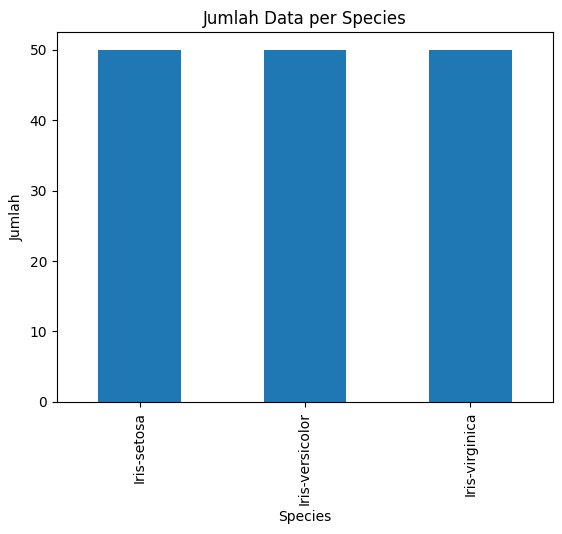

In [8]:

df['species'].value_counts().plot(kind='bar')
plt.title("Jumlah Data per Species")
plt.xlabel("Species")
plt.ylabel("Jumlah")
plt.show()



Grafik menunjukkan setiap spesies memiliki 50 data.
Dataset termasuk balanced dataset sehingga tidak ada ketimpangan kelas.



## 2.12 Histogram Fitur Numerik


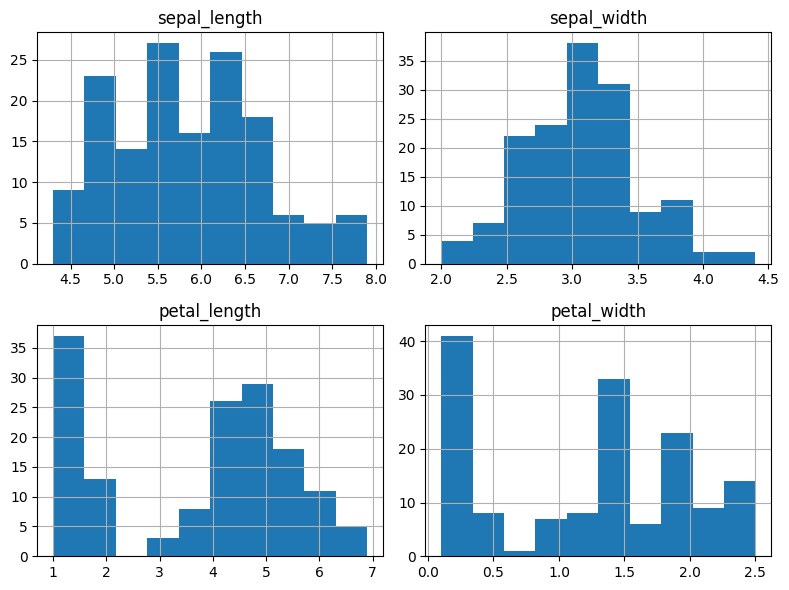

In [9]:

df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()



Histogram menunjukkan distribusi fitur relatif normal.
Tidak ditemukan nilai ekstrem yang mencolok.



## 2.13 Boxplot untuk Deteksi Outlier


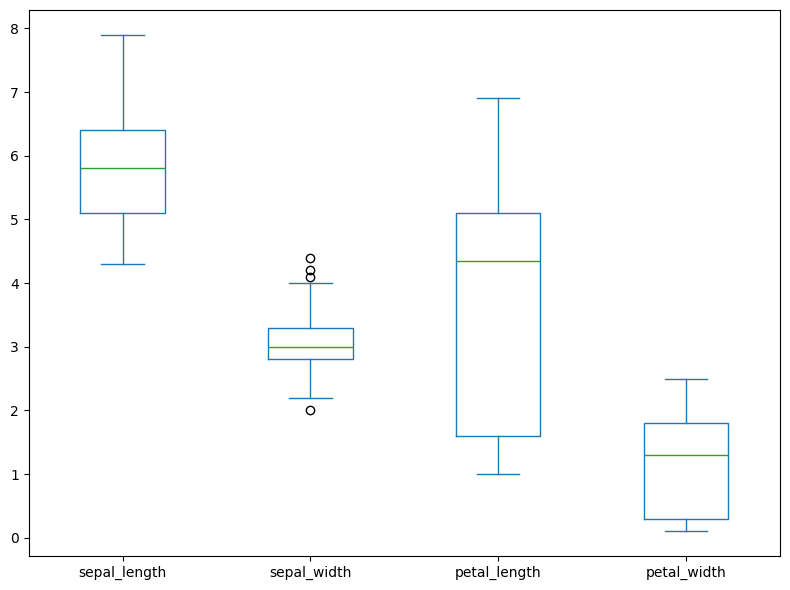

In [10]:

df.plot(kind='box', figsize=(8,6))
plt.tight_layout()
plt.show()



Boxplot menunjukkan tidak terdapat outlier ekstrem.
Sebaran nilai antar fitur stabil.



## 2.14 Scatter Plot Petal Length vs Petal Width


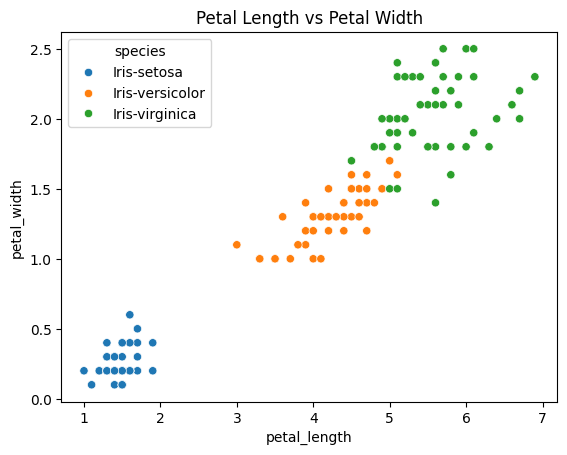

In [11]:

sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.title("Petal Length vs Petal Width")
plt.show()



Terlihat bahwa Iris-setosa terpisah jelas dari dua spesies lainnya.
Fitur petal_length dan petal_width memiliki kontribusi besar dalam proses klasifikasi.



# Implementasi Menggunakan Orange Data Mining

## 2.15 Penjelasan Orange 

Orange Data Mining merupakan tools visual programming untuk analisis data dan machine learning. Berbeda dengan Python yang berbasis coding, Orange menggunakan pendekatan berbasis workflow (drag-and-drop), sehingga proses analisis dilakukan dengan menghubungkan widget.

Pada analisi ini, Orange digunakan untuk:

-   Mengimpor dataset Iris
    
-   Melihat statistik kolom (mean, median, mode)
    
-   Melihat distribusi fitur
    
-   Melakukan visualisasi scatter plot
    
-   Membandingkan hasil dengan analisis Python


## 2.16 Workflow Analisis di Orange

![Workflow Orange](images/workflow.png)


Alur kerja terdiri dari:

1.  **CSV File Import**
    
    -   Digunakan untuk mengimpor dataset IRIS.csv.
        
2.  **Column Statistics**
    
    -   Untuk melihat ringkasan statistik tiap kolom.
        
3.  **Scatter Plot**
    
    -   Untuk melihat hubungan antar fitur.
        
4.  **Distributions**
    
    -   Untuk melihat distribusi masing-masing fitur.
        

Workflow ini menunjukkan pendekatan visual dari proses Data Understanding yang sebelumnya dilakukan menggunakan Python.


## 2.17 Proses Import Dataset Iris di Orange

![import Orange](images/import.png)


Pada tahap ini:

-   Encoding: UTF-8
    
-   Delimiter: Comma (,)
    
-   Kolom dikenali otomatis sebagai:
    
    -   4 kolom numerik
        
    -   1 kolom kategorikal (species)
        

Dari tampilan preview terlihat bahwa:

-   Struktur data sudah sesuai.
    
-   Tidak terdapat kesalahan pembacaan kolom.
    
-   Tidak ada nilai kosong pada baris awal.
    

Hal ini menandakan dataset valid dan siap dianalisis.


## 2.18 Analisis Statistik Kolom (Mean, Median, Mode)

![statistik Orange](images/mean.png)


Pada widget Column Statistics diperoleh informasi:

Untuk fitur numerik:

-   Mean (Rata-rata)
    
-   Median
    
-   Mode
    
-   Minimum
    
-   Maximum
    
-   Dispersion (variasi data)
    
-   Missing value (0%)
    

Contoh interpretasi:

-   **sepal_length**
    
    -   Mean sekitar 5.84
        
    -   Median sekitar 5.8
        
    -   Tidak ada missing value
        
-   **petal_width**
    
    -   Mean sekitar 1.19
        
    -   Nilai minimum 0.1
        
    -   Nilai maksimum 2.5
        

Kesimpulan:

-   Tidak ada data kosong.
    
-   Rentang nilai masih dalam batas biologis yang wajar.
    
-   Hasil ini konsisten dengan analisis statistik deskriptif pada Python.
    

Artinya, validasi silang antara Python dan Orange menunjukkan hasil yang konsisten.


## 2.18 Analisis Distribusi Fitur

![distribusi Orange](images/mean.png)


Analisis distribusi dilakukan untuk memahami pola penyebaran nilai pada setiap fitur numerik dalam dataset Iris. Dengan melihat histogram, kita dapat mengidentifikasi:

-   Rentang nilai
    
-   Pola distribusi (normal/tidak)
    
-   Kemungkinan adanya pemisahan kelas
    
-   Indikasi outlier
    

Dataset memiliki empat fitur numerik, yaitu:

-   sepal_length
    
-   sepal_width
    
-   petal_length
    
-   petal_width
    

Berikut analisis masing-masing fitur.

## Distribusi Petal Length

![distribusi Orange](images/petal-length.png)


Histogram menunjukkan dua kelompok distribusi yang cukup jelas:

-   Kelompok pertama berada pada rentang sekitar 1.0 – 2.0
    
-   Kelompok kedua berada pada rentang sekitar 3.0 – 7.0
    

Interpretasi:

-   Kelompok pertama merepresentasikan Iris-setosa
    
-   Kelompok kedua mencakup Iris-versicolor dan Iris-virginica
    

Distribusi ini tidak berbentuk normal tunggal, melainkan multimodal (lebih dari satu puncak). Hal ini menunjukkan bahwa fitur petal_length memiliki kemampuan diskriminatif yang kuat dalam membedakan spesies bunga.

## Distribusi Petal Width

![distribusi Orange](images/petal-width.png)


Histogram menunjukkan dua kelompok utama:

-   Rentang 0.1 – 0.6 → dominan Iris-setosa
    
-   Rentang 1.0 – 2.5 → dominan Versicolor & Virginica
    

Distribusi ini sangat terpisah antara Setosa dan dua spesies lainnya.

Interpretasi:

-   Fitur petal_width memiliki pemisahan kelas yang sangat jelas.
    
-   Hampir tidak ada overlap antara Setosa dan spesies lainnya.


## Distribusi Sepal Length

![distribusi Orange](images/sepal-length.png)


Distribusi sepal_length lebih menyebar dibandingkan petal.

-   Rentang nilai sekitar 4.3 – 7.9
    
-   Distribusi cenderung mendekati normal
    
-   Terjadi overlap antar kelas
    

Interpretasi:

-   Fitur ini tidak menunjukkan pemisahan kelas yang sangat jelas.
    
-   Ketiga spesies memiliki nilai yang saling bertumpang tindih.

## Distribusi Sepal Width

![distribusi Orange](images/sepal-width.png)

Distribusi berada pada rentang sekitar 2.0 – 4.4

Karakteristik distribusi:

-   Cenderung mendekati normal
    
-   Terjadi banyak overlap antar kelas
    
-   Tidak menunjukkan pemisahan yang tegas
    

Interpretasi:

Sepal_width memiliki daya diskriminasi paling rendah dibandingkan fitur lainnya.




## 2.19 Analisis Scatter Plot (Petal Length vs Petal Width)

![Workflow Orange](images/scatter.png)

Scatter plot digunakan untuk melihat hubungan antara dua variabel numerik serta untuk mengamati pola pemisahan kelas dalam dataset.

Pada analisis ini digunakan:

-   Sumbu X → **petal_length**
    
-   Sumbu Y → **petal_width**
    

Tujuan analisis ini adalah untuk melihat apakah kedua fitur tersebut mampu membedakan spesies bunga Iris secara visual.

## 2.20 Konsistensi dengan Analisis Python

Scatter plot ini konsisten dengan hasil implementasi menggunakan Python sebelumnya, di mana:

-   Visualisasi seaborn menunjukkan pemisahan kelas yang jelas.
    
-   Fitur petal menjadi fitur paling informatif dibandingkan sepal.
    

Artinya, hasil analisis menggunakan Orange maupun Python memberikan kesimpulan yang sama.



# Kesimpulan

Berdasarkan seluruh proses Data Understanding:

1. Dataset berhasil dibaca tanpa error.
2. Struktur dataset sesuai dokumentasi.
3. Tidak terdapat missing value.
4. Tidak terdapat duplikasi signifikan.
5. Dataset seimbang antar kelas.
6. Tidak ditemukan outlier ekstrem.
7. Fitur petal menunjukkan pemisahan kelas yang jelas.
8. Hasil analisis menggunakan Python dan Orange menunjukkan kesimpulan yang konsisten.

Dengan demikian, dataset dinyatakan siap untuk masuk ke tahap Data Preparation.
